In [0]:
# 텐서플로우 버전이 않맞아서 처리
!pip install tensorflow==1.15

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
%tensorflow_version 1.x
tf.__version__

TensorFlow is already loaded. Please restart the runtime to change versions.


'1.15.0'

# DQN

- Deep Q-Network
- 심층 강화 학습
- 개요
   - Q 학습에서는 행동 가치 함수(Q)를 테이블 형식으로 표현
   - 상태의 종류가 많아지면, 테이블의 행의 수도 증가된다
   - 상태의 수가 많아지면, 기존 방식으로는 엄청 많은 학습이 필요로 하다 => 테이블 형식이 아닌, 뉴럴 네트워크 방식으로 표현하자 
    - DQN 등장
      - 입력: 상태
      - 출력: 행동
    - 특정한 상태에서 특정한 행동을 선택할 확률을 추론한다

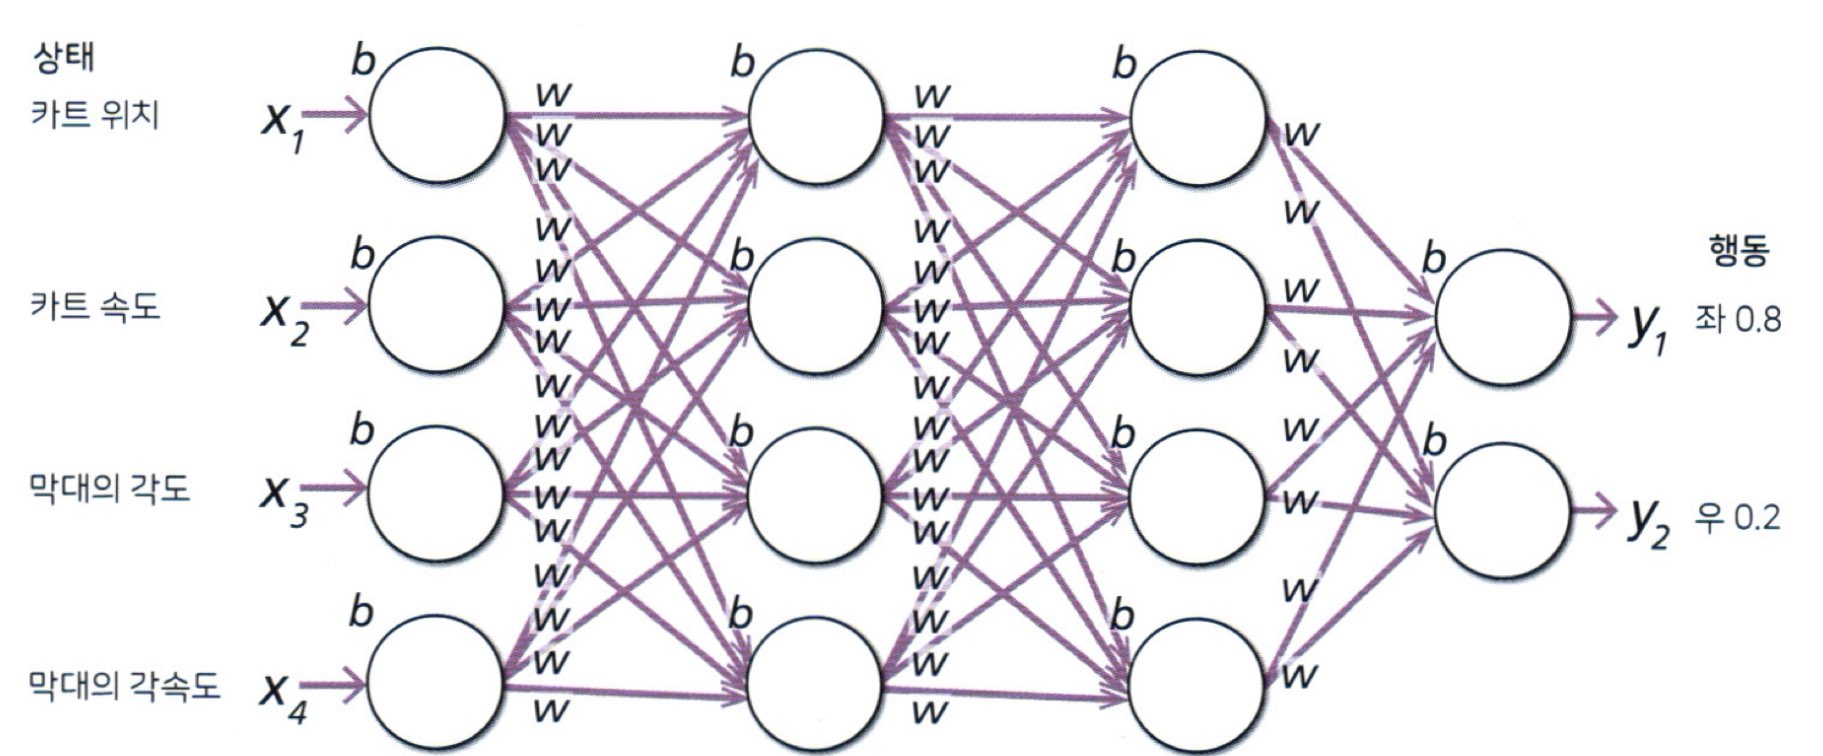

In [3]:
#그림, 신경망
from IPython.display import Image

Image('/content/drive/My Drive/Colab Notebooks/강화/dqn1.jpeg', width=600)


# 구현 

- OpenAI Gym
  - 비영리 단체 OpenAI에서 제공
  - 강화 학습 툴킷
  - http://gym.openai.com/envs/#classic_control
  - 본 게임 : http://gym.openai.com/envs/CartPole-v1/
  

# 강화학습 요소

|강화 학습 요소|카트-폴|
|--:|:--|
|환경|레일 상에 카트위에 막대기가 세워져 있다, 카트는 좌우로 움직임가능|
|목적|막대가 쓰러지지 않도록 카트 균형 잡기|
|에피소드|막대가 쓰러지면 종료|
|상태|- 카트의 위치<BR>- 카트의 속도<BR>- 막대의 각도<BR>- 막대의 각속도<BR>|
|행동|- 카트를 왼쪽으로 이동<BR>- 카트를 오른쪽으로 이동<BR>|
|보상|에피소드 완료시 190, 스템이상이면 +1|
|학습 방법|DQN|
|파라미터 갱신 간격|행동 1회마다|

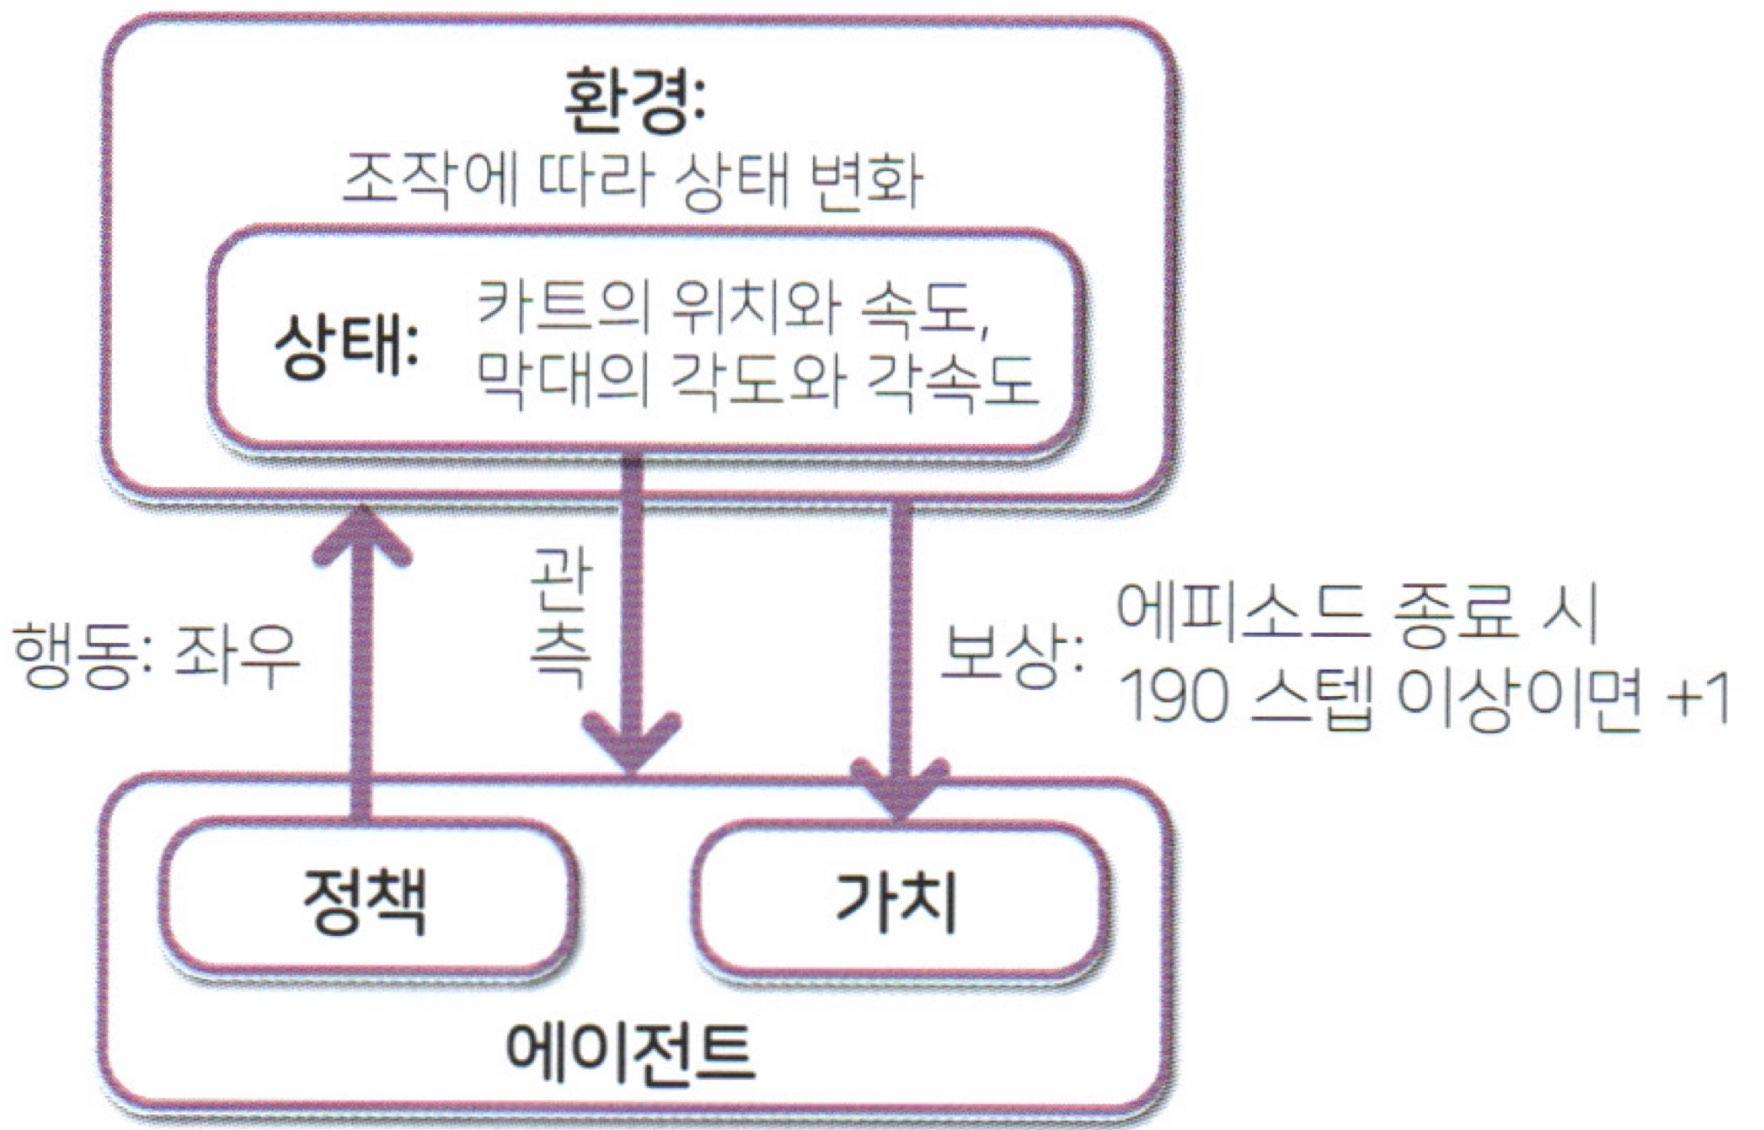

In [0]:
#그림 (Q학습, DQN)
Image('/content/drive/My Drive/Colab Notebooks/강화/dqn2.jpeg', width=600)

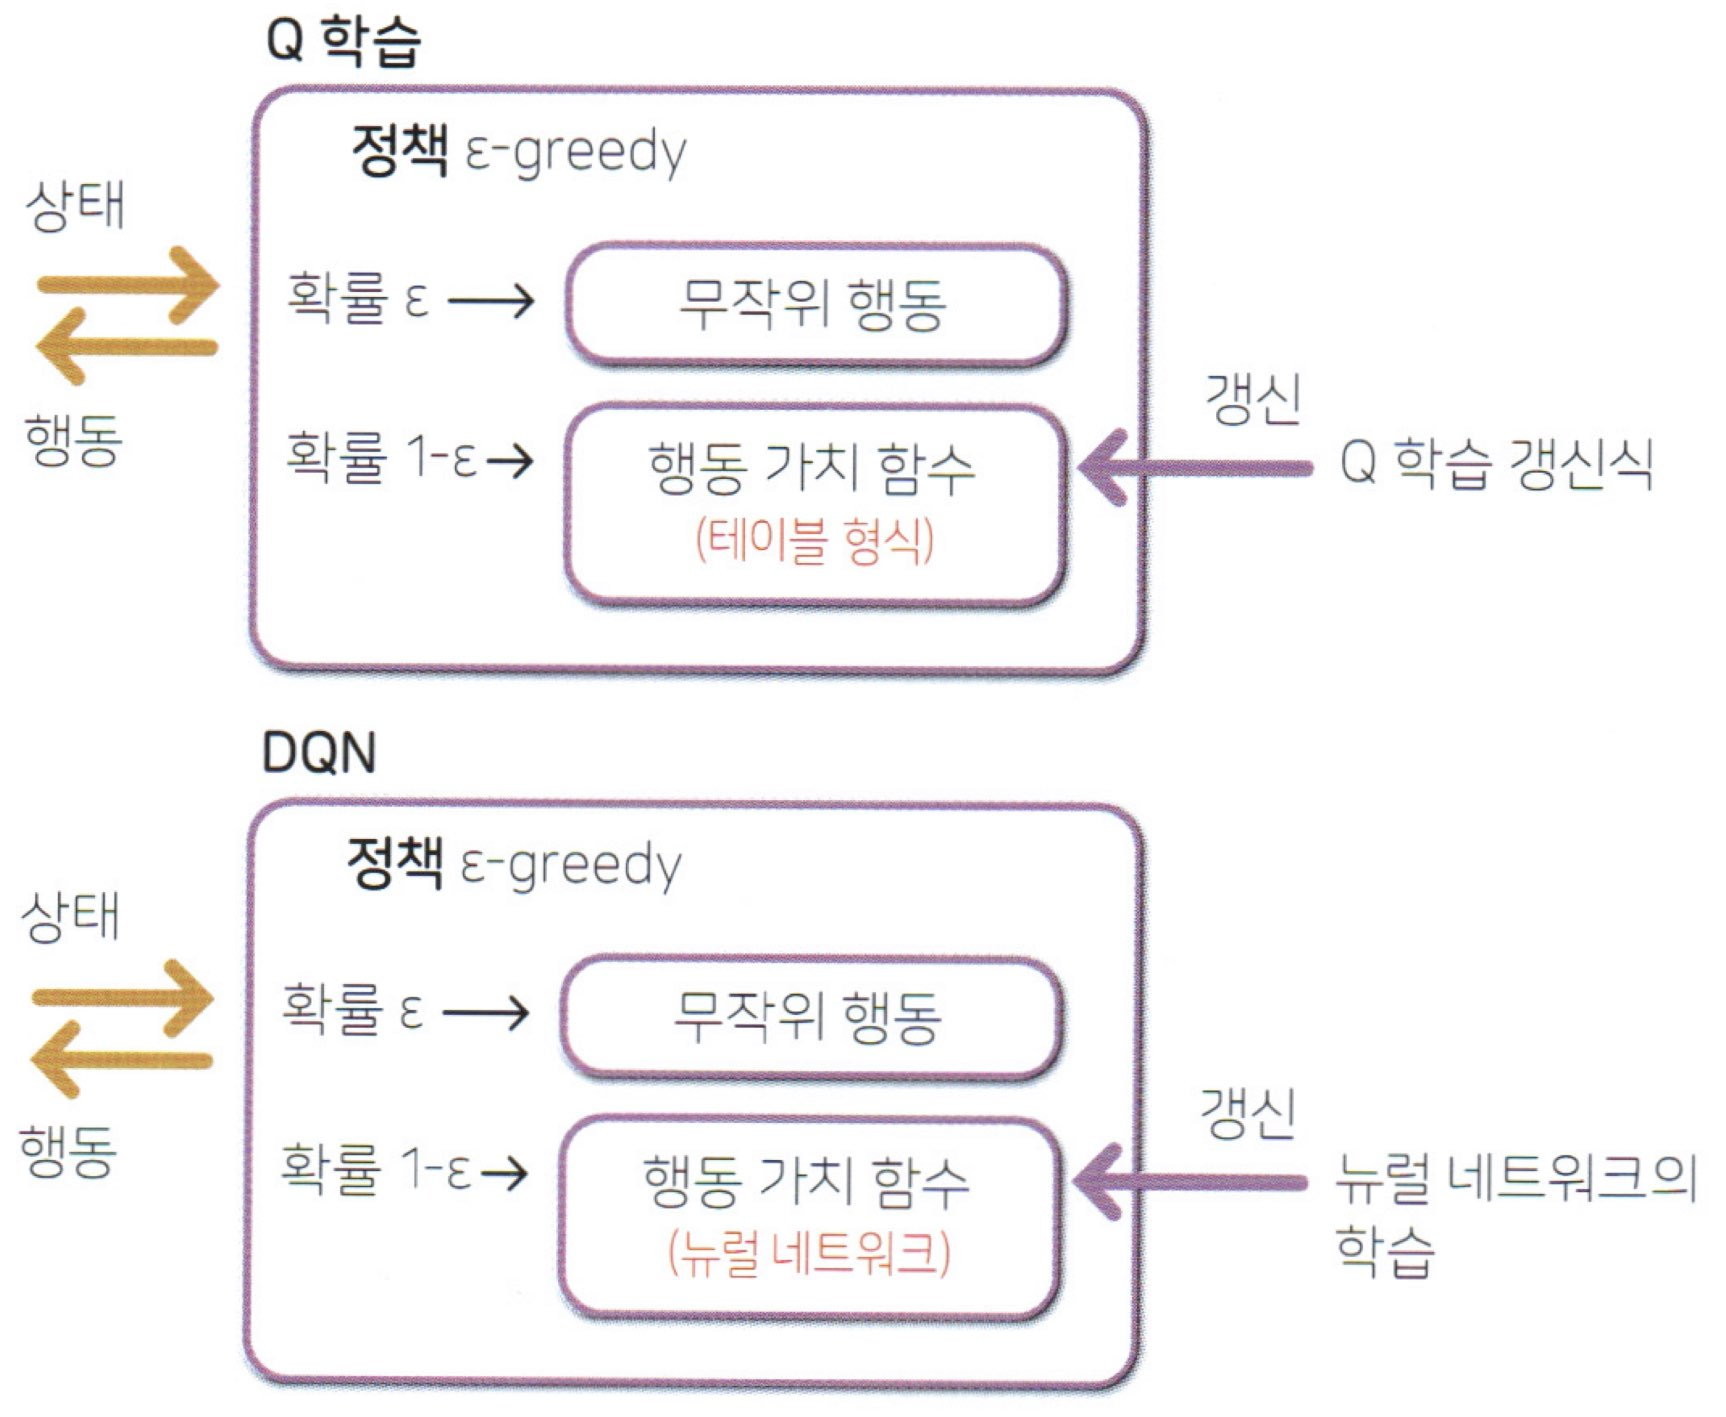

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/dqn3.jpeg', width=600)

# 뉴럴네트워크 구성

- DQN은 행동 가치 함수를 뉴럴 네트워크로 표현
- 뉴럴 네트워크 학습에 따라 갱신
- 카트-폴의 상태는 4이므로
  - 입력 : (4,)
    - 카트의 위치
    - 카트의 속도
    - 막대의 각도
    - 막대의 각속도
    - ex) [ 0.0233243, 0.4687273, -0.1234556, -1.0929848]
  - 출력 : (2,)
    - 카트를 왼쪽으로 이동한 가치
    - 카트를 오른쪽으로 이동한 가치
    - ex) [0.050323, 0.653245]
    - 뉴럴 네트워크를 학습함에 따라 특정한 상태에서 특정한 행동을 선택할 때의 가치를 추론할수 있다

# DQN의 4가지 기반 기술

- Experience Replay
  - Q 학습에서는 경험(상태, 행동, 보상, 다음상태)을 순서에 따라 학습
  - 시간적으로 상관 관계가 높은 내용을 연속해서 학습해서 학습하게 되므로, 학습이 안정되지 못하는 경향을 가짐
  - DQN은 Experience Replay를 이용하여 해결
    - 기억에 경험을 많이 저장한뒤, 나중에 무작위로 학습

- Fixed Target Q-Network
  - Q 학습은 행동 가치 함수 자체를 이용하여 행동 가치 함수를 갱신했다
  - 동일 방법이라면, 갱신중인 NN을 이용하여 해당 NN 갱신을 위한 계산을 하게 되면, 학습이 불안전하게 된다
  - DQN은 Fixed Target Q-Network을 이용하여 갱신량만을 계산하는 별도의  NN을 이용하여 이 문제를 해결 
  - 갱신 대상이 되는 뉴럴 네트워크를 메인 네트워크
  - 갱신량을 계산하기 위해 뉴럴 네트워크를 대상 네트워크
  - 대상 네트워크는 과거의 메인 네트워크로 일정 간격으로 메인 네트워크의 가중치를 대상 네트워크로 덮어쓰면서 갱신

- Reward Clipping
  - 환경으로 받는 보상은 각각 다 스케일이 다르다
  - DQN은 이를 보완하기 위해, 모든 환경에서 보상 스케일을 -1, 0, 1로 고정
  - 환경에 관계없이 동일한 하이퍼 파라미터를 사용해 학습을 수행할 수 있다

- Huber Loss
  - 뉴럴 네트워크 오차가 큰 경우 오차 함수로 평균 제곱 오차를 사용하면 출력이 너무 커서 학습이 안정화 되지 못한다
  - DQN은 오차가 큰 경우에도 값이 안정되도록 휴버 함수를 사용한다

In [0]:
# 패키지 임포트
import gym
import numpy as np
# 신경망 구성 시작 객체
from tensorflow.keras.models import Sequential
# 레이어 구성
from tensorflow.keras.layers import Dense
# 최적화 도구
from tensorflow.keras.optimizers import Adam
# DQN의 4대 기술중 하나, 오차가 큰게 나와서 값이 안정화 되도록 손실 처리를 해줌
from tensorflow.losses import huber_loss

from collections import deque

In [0]:
# 파라미터 준비  =>  
NUM_EPISODES  = 500   # 에피소드 수,    학습을 수행할 수
MAX_STEPS     = 200   # 최대 스텝 수, 1 에피소드내에 최개 스탭수
GAMMA         = 0.99  # 시간 할인율,  Q 학습시 시간 할인율
WARMUP        = 10    # 초기화(초기화시) 시 조작하지 않을 스텝 수, 게임 시작 초기 상태에 변동을 반영, 학습이 진행되는 것을 방지
# 탐색 파라미터  => ε-greedy 알고리즘 : E_START -> E_DECAY_RATE 비율로 감소 -> E_STOP
E_START       = 1.0   # ε 초기값
E_STOP        = 0.01  # ε 최종값
E_DECAY_RATE  = 0.001 # ε 감쇠율
# 메모리 파라미터 => Experience Replay
MEMORY_SIZE   = 10000 # 경험 메모리 사이즈
BATCH_SIZE    = 32    # 배치 사이즈

In [0]:
# 행동 가치 함수 정의
# 케라스로 구현
class QNetwork:
    # 초기화
    # state_size : 상태수 : 카트의 위치. 카트의 속도. 막대의 각도, 막대의 각속도
    # action_size: 카트를 왼쪽으로 이동한 가치, 카트를 오른쪽으로 이동한 가치
    def __init__(self, state_size, action_size):
        # 모델 생성
        self.model = Sequential()
        # 1. 입력층 => 상태 개수 4개
        self.model.add(Dense(16, activation='relu', input_dim=state_size))
        # 2. 은닉 계층
        self.model.add(Dense(16, activation='relu'))
        # 3. 은닉 계층
        self.model.add(Dense(16, activation='relu'))
        # 4. 출력층 => 선형처리 => 선형 분리 처리 =>  2개의 행동으로 수렴
        self.model.add(Dense(action_size, activation='linear'))
        # 모델 컴파일, 손실함수, 최적화 도구
        # DQN의 특징 4 적용 : huber_loss
        self.model.compile(loss=huber_loss, optimizer=Adam(lr=0.001))

In [0]:
a = np.random.choice(np.arange(1000), size=32, replace=False)
len(a), a, len(set(a))

(32, array([911, 865, 232, 136, 638, 184, 460, 397, 467, 903, 564, 592, 880,
        630,   6, 248, 710, 433, 506, 871, 146, 584,  65, 366, 231,  61,
        313, 988, 978, 890, 875, 771]), 32)

In [0]:
# 경험 메모리 정의
# DQN의 특징 1 적용 : Experience Replay 적용 => 경험 메모리 사용 
class Memory():
    # 초기화
    # 주어진 사이즈로 deque에 저장된다
    # memory_size : deque의 크기 
    # deque는 먼저 들어간 데이터가 먼저 나간다(나가는 조건은 큐의 크기를 넘어서서 더 데이터를 넣으면)
    # 맨 처음에 위치한 요소가 먼저 나간다 => 오래된 경험이 먼저 삭제된다는 특징을 가짐
    def __init__(self, memory_size):
      self.buffer = deque(maxlen=memory_size)
    # 매 스템마다 경험을 추가
    def add(self, experience):
      self.buffer.append(experience)
    # 배치 사이즈 만큼 경험을 랜덤하게 취득
    # 샘플 데이터, 즉 경험을 랜덤으로 획득 => NN에서 학습시 데이터로 사용한다 
    def sample(self, batch_size):
      # 버퍼의 크기만큼 0 ~ 버퍼크기(10000) 내에서  batch_size 만큼 겹치지 않는 랜덤수를 구하여 리스트로 리턴
      idx = np.random.choice(np.arange(len(self.buffer)), size=batch_size, replace=False)
      # 그렇게 구한 값 인덱스로 보고 그 인덱스 자리에 있는 데이터를 구해서 리스트로 반환
      # 버퍼 전체에서 샘플링하여 데이터를 리턴
      return [self.buffer[i] for i in idx]
    # 경험 메모리 사이즈
    def __len__(self):
      return len(self.buffer)

In [0]:
# 환경 생성
# OpenAI Gym(짐, 헬스장, AI 훈련하는 곳)
# 카트-풀 환경 생성
env           = gym.make('CartPole-v0')
state_size    = env.observation_space.shape[0] # 상태공간, 상태수를 구한다
action_size   = env.action_space.n             # 액션공간, 액션수를 구한다

state_size, action_size

(4, 2)

- gym은 5개 함수 지원
  - reset()   : 환경 초기화, 초기 상태 반환
  - step(액션) : 행동을 실행하고, 경험(상태, 보상, 에피소드완료, 정보등) 반환   
  - render()  : 인자를 시각화 함, human(디스플레이그리기:코렙불가), rgb_array(픽셀이미지RGB), ansi(문자열)
  - close()   : 환경 닫기
  - seed()    : 난수 발생 시드 고정

In [0]:
# DQN 특징 2번째, Fixed Target Q-Network 적용 
# 갱신중인 NN을 이용하여 해당 NN 갱신을 위한 계산을 하게 되면, 학습이 불안전하게 된다
# 갱신 대상이 되는 뉴럴 네트워크를 메인 네트워크
# 갱신량을 계산하기 위해 뉴럴 네트워크를 대상 네트워크
# 대상 네트워크는 과거의 메인 네트워크로 일정 간격으로 메인 네트워크의 가중치를 대상 네트워크로 덮어쓰면서 갱신

# 메인 네트워크 생성 : 갱신 대상
main_qn     = QNetwork(state_size, action_size)

# 대상 네트워크 생성 : 갱신량을 계산
target_qn   = QNetwork(state_size, action_size)

# 경험 메모리 생성
memory      = Memory(MEMORY_SIZE)
# 버퍼크기는 잡히나, 데이터가 추가되지 않으면 크기는 0이다
len(memory)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0

In [0]:
len(memory)

0

In [0]:
# 학습 개시
# 환경 초기화, 초기값 반환
state = env.reset()
print(state)
# 차원 조정 => ( 배치크기, 상태수 )
state = np.reshape(state, [-1, state_size])    
state.shape, state

[-0.00862099  0.0132293   0.00469361 -0.02927344]


((1, 4), array([[-0.00862099,  0.0132293 ,  0.00469361, -0.02927344]]))

In [0]:
np.exp(-0.001*1), (1.0-0.01)*np.exp(-0.001*1)

(0.999000499833375, 0.9890104948350412)

In [0]:
from tensorflow.python.client import device_lib
for device in device_lib.list_local_devices():
  print(device.name)
  print(device.memory_limit)

/device:CPU:0
268435456
/device:XLA_CPU:0
17179869184
/device:XLA_GPU:0
17179869184
/device:GPU:0
7470045594


In [0]:
from tensorflow.keras import backend as K

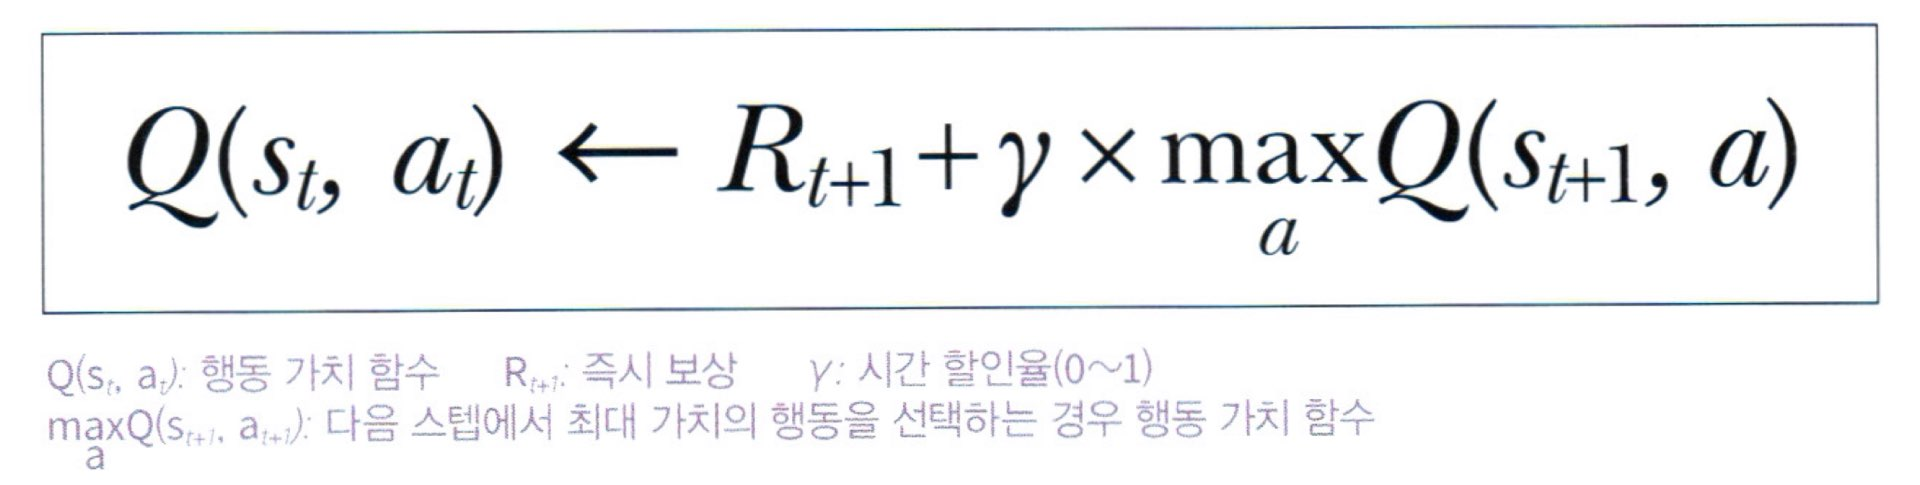

In [4]:
Image('/content/drive/My Drive/Colab Notebooks/강화/dqn4.jpg', width=600)

In [0]:
with tf.device('/device:GPU:0'):
  # 에피소드 수 만큼 메피소드 반복
  total_step    = 0 # 총 스텝 수
  success_count = 0 # 성공 수, 5연속으로 성공하면 학습 완료 처리(loop 탈출)
  for episode in range(1, NUM_EPISODES+1):
      step = 0 # 스텝 수
      
      # 메인 네트워크의 가중치를 대상 네트워크에 덮어쓰기 처리
      target_qn.model.set_weights(main_qn.model.get_weights())
      
      # 1 에피소드 루프
      # 1 에피소드내에 최대 스탭수 만큼 반복
      for _ in range(1, MAX_STEPS+1):
          step        += 1  # 스텝 1 증가
          total_step  += 1  # 전체 스텝 증가
          # ε를 감소시킴 (행동 선택에 사용)
          # E_START       = 1.0   # ε 초기값
          # E_STOP        = 0.01  # ε 최종값
          # E_DECAY_RATE  = 0.001 # ε 감쇠율
          # 최종값 + (초기값 - 최종값) * np.exp(-감쇠울*전체스텝수)
          # np.exp(-0.001*1), (1.0-0.01)*np.exp(-0.001*1)
          # (0.999000499833375, 0.9890104948350412)
          epsilon     = E_STOP + (E_START - E_STOP)*np.exp(-E_DECAY_RATE*total_step)
          
          ##############
          # 1. 행동횟득
          # 랜덤하게 행동 선택
          if epsilon > np.random.rand():          # 난수가 엡실론보다 작으면
              action = env.action_space.sample()  # 환경에서 행동 샘플 획득(2개중 1개)
          # 행동 가치 함수에 따른 행동 선택
          else: 
              # 메인 네트워크의 현재 상태를 넣어서 예측하여 가장 큰 값을 가진 행동을 획득 
              action = np.argmax(main_qn.model.predict(state)[0]) 

          ##############
          # 2. 행동에 맞추어 상태와 보상을 얻음
          # 행동 수행 후 다음 상태와 보상을 받음
          # 원래 보상을 스텝마다 보상 1을 주지만 여기서는 배제하고, 에피소드 완료시에 지급
          # 다음상태, 무시, 완료여부, 무시 = env.step(action)
          next_state, _, done, _ = env.step(action)
          # 다음 상태 획득및 차원 조정
          next_state = np.reshape(next_state, [1, state_size])

          ##############
          # 게임 자체는 빌려 쓰는 구조이므로, 에피소드 완료 여부는 결과를 받아서 확인함
          # 에피소드 완료 시
          if done:
              # 보상 지정
              # 에피소드가 끝났다고 나왔는데, 190 스텝 이상이면 보상을 주고, 성공회수 1을 추가
              if step >= 190:
                  success_count += 1
                  reward        = 1
              else:# 보상없고, 성공없다
                  success_count = 0
                  reward        = 0
              # 다음 상태에 상태 없음을 대입
              next_state = np.zeros(state.shape)
              # 경험 추가
              if step > WARMUP:
                # 경험 추가 (현재상태(4개), 액션, 보상, 다음상태), 4개 데이터가 1세트로 들어감
                memory.add((state, action, reward, next_state))                        
          # 에피소드 미완료 시
          else:
              # 보상 지정
              reward = 0
              # 웜웝 단계를(10회)를 넘어서면 
              if step > WARMUP:
                # 경험 추가 (현재상태(4개), 액션, 보상, 다음상태), 4개 데이터가 1세트로 들어감
                memory.add((state, action, reward, next_state))
              # 상태에 다음 상태 대입
              state = next_state

          ############
          # 경험이 쌓인후, 최소 BATCH_SIZE보다 크면, 행동 평가 함수 갱신=>NN
          if len(memory) >= BATCH_SIZE:
              # 뉴럴 네트워크의 입력과 출력 준비
              inputs  = np.zeros((BATCH_SIZE, 4)) # 입력(상태)
              targets = np.zeros((BATCH_SIZE, 2)) # 출력(행동별 가치)
              # 배치 사이즈 만큼 경험을 랜덤하게 선택
              minibatch = memory.sample(BATCH_SIZE)
              
              # 데이터 개수만큰 정보 획득
              # 뉴럴 네트워크 입력과 출력 생성
              # 경험으로 부터 => (상태, 행동, 보상, 다음상태) 1세트씩 획득
              '''
              # 1세트 샘플
              [0.xx, 0.xx, 0.xx, 0.xx], 1, 0, [0.xx,0.xx,0.xx,0.xx]
              '''
              for i, (state_b, action_b, reward_b, next_state_b) in enumerate(minibatch):    
                  # 입력 상태 지정:4개 데이터 입력
                  inputs[i] = state_b
                  # 다음 행동이 0행렬과 같지 않다면, 즉 데이터가 존재하면
                  if not (next_state_b == np.zeros(state_b.shape)).all(axis=1):
                    # 선택한 행동에 대한 가치 계산
                    # target = 즉시보상 + 시간할인율*(대상 모델에서 다음 상태 정보를 넣어서 가치의 행동을 예측받아 최대 가치를 획득)
                    target = reward_b + GAMMA * np.amax(target_qn.model.predict(next_state_b)[0])
                  else: # 다음 행동이 없는 경우는, 에피소드 완료시
                    target = reward_b

                  # 출력에 행동 별 가치를 지정
                  # 현재 행동에 대한 메인 모델에서 행동을 예측받아서 [ 카트를 왼쪽으로 이동한 가치, 카트를 오른쪽으로 이동한 가치 ]
                  targets[i] = main_qn.model.predict(state_b)
                  # 행동가치값 설정
                  targets[i][action_b] = target # 선택한 행동의 가치

              # 행동 가치 함수 갱신 훈련
              # inputs:입력상태, targets:행동가치입력, 학습회수=1. 로그미출력
              main_qn.model.fit(inputs, targets, epochs=1, verbose=0)
          
          # 에피소드 완료 시
          if done:
              # 에피소드 루프 이탈
              break
            
      # 에피소드 완료 시 로그 표시
      # 에피소드 번호, 스텝수, 행동선택시 사용한 엡실론값
      print('에피소드: {}, 스텝 수: {}, epsilon: {:.4f}'.format(episode, step, epsilon))
      # 5회 연송 성공으로 학습 완료
      if success_count >= 5:
          break
      # 환경 초기화
      state = env.reset()
      state = np.reshape(state, [1, state_size])    

에피소드: 1, 스텝 수: 12, epsilon: 0.9882
에피소드: 2, 스텝 수: 12, epsilon: 0.9765
에피소드: 3, 스텝 수: 16, epsilon: 0.9612
에피소드: 4, 스텝 수: 17, epsilon: 0.9451
에피소드: 5, 스텝 수: 14, epsilon: 0.9321
에피소드: 6, 스텝 수: 52, epsilon: 0.8854
에피소드: 7, 스텝 수: 11, epsilon: 0.8758
에피소드: 8, 스텝 수: 10, epsilon: 0.8672
에피소드: 9, 스텝 수: 19, epsilon: 0.8511
에피소드: 10, 스텝 수: 11, epsilon: 0.8419
에피소드: 11, 스텝 수: 12, epsilon: 0.8320
에피소드: 12, 스텝 수: 14, epsilon: 0.8205
에피소드: 13, 스텝 수: 11, epsilon: 0.8117
에피소드: 14, 스텝 수: 14, epsilon: 0.8005
에피소드: 15, 스텝 수: 13, epsilon: 0.7903
에피소드: 16, 스텝 수: 30, epsilon: 0.7673
에피소드: 17, 스텝 수: 16, epsilon: 0.7552
에피소드: 18, 스텝 수: 14, epsilon: 0.7449
에피소드: 19, 스텝 수: 13, epsilon: 0.7354
에피소드: 20, 스텝 수: 11, epsilon: 0.7275
에피소드: 21, 스텝 수: 13, epsilon: 0.7182
에피소드: 22, 스텝 수: 12, epsilon: 0.7097
에피소드: 23, 스텝 수: 18, epsilon: 0.6973
에피소드: 24, 스텝 수: 20, epsilon: 0.6836
에피소드: 25, 스텝 수: 17, epsilon: 0.6723
에피소드: 26, 스텝 수: 76, epsilon: 0.6238
에피소드: 27, 스텝 수: 29, epsilon: 0.6063
에피소드: 28, 스텝 수: 23, epsilon: 0.5927
에

In [0]:
# 디스플레이 설정 인스톨
# 일반 PC에서는 env를 이용하여 render() 처리하여 윈도우에 그릴수 잇다(코렙은 불가)
# xvfb는 X 윈도우 시스템의 가상 디스플레이를 만들어 주는 s/w
# 이것을 이용하면 실제 스크린이 없는 상황에서도 GUI가 필요한 프로그램을 실행해 줄수 있다
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg x11-utils > /dev/null
# PYGLET은 Python 프로그래밍 언어 용 라이브러리로 게임 및 기타 멀티미디어 응용 프로그램 제작을위한 객체 지향 응용 프로그램 프로그래밍 인터페이스를 제공
!pip install pyglet==1.5.0
# opengl (3D 그래픽스 파이썬으로 래핑)
!pip install pyopengl
# 파이썬에서 가상 디스플레이(Xvfb)를 생성하는 패키지
!pip install pyvirtualdisplay
# 설치시 restart가 뜨면 런타임 다시시작을 선택

In [0]:
# 디스플레이 설정 적용
from pyvirtualdisplay import Display
import os
disp = Display(visible=0, size=(1024, 768))
disp.start()
os.environ['DISPLAY'] = ':' + str(disp.display) + '.' + str(disp.screen)

In [0]:
# 평가
frames = [] # 애니메이션 프레임

# 환경 초기화
state = env.reset()
state = np.reshape(state, [1, state_size])

# 1 에피소드만큼(최대 step 수만큼) 게임을 실행하여 화면이미지를 수집함
step = 0 # 스텝 수
for step in range(1, MAX_STEPS+1):
    step += 1
    # 애니메이션 프레임 추가(핵심)
    frames.append(env.render(mode='rgb_array'))
    # 최적 행동을 선택
    action = np.argmax(main_qn.model.predict(state)[0])
    # 행동에 밪추어 다음 상태, 보상을 얻음, 에피소드 완료 여부
    next_state, reward, done, _ = env.step(action)
    # 다음 상태 shape 조정
    next_state = np.reshape(next_state, [1, state_size])
    # 에피소드 완료 시
    if done:
        # 다음 상태에 상태 없음을 대입
        next_state = np.zeros(state.shape)
        # 에피소드 루프 이탈
        break
    else:
        # 상태에 다음 상태를 대입
        state = next_state

# 에피소드 완료 시 로그 표시
print('스텝 수: {}'.format(step))

스텝 수: 114


In [0]:
len(frames), len(frames[0]), frames[0].shape

(113, 400, (400, 600, 3))

In [0]:
# JSAnimation 설치
# matplotlib에서 javascript 애니메이션을 생성하는 패키지
!pip install JSAnimation

In [0]:
import JSAnimation as jsa
dir(jsa), jsa.HTMLWriter.frame_format

(['HTMLWriter',
  'IPython_display',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'html_writer'],
 <property at 0x7fc99a06ae08>)

In [0]:
import pickle

with open('/content/drive/My Drive/Colab Notebooks/강화/dqn.frame','wb') as f:
  pickle.dump(frames, f)

In [0]:
# 패키지 임포트
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
from IPython.display import HTML, display
%matplotlib inline

# 애니메이션 재생 정의
def display_frames_as_gif(frs):
  plt.figure(figsize=(frs[0].shape[1]/72.0, frs[0].shape[0]/72.0), dpi=72)
  patch = plt.imshow(frs[0])
  plt.axis('off')
  # 애니메이션 정기 처리
  def animate(i):
    patch.set_data(frs[i])
    #return patch
  # 애니메이션 관리
  anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frs), interval=50)
  #HTML(anim.to_jshtml())
  #print(1)
  display(display_animation(anim, default_mode='loop'))
    
# 애니메이션 재생
display_frames_as_gif(frames)

AttributeError: ignored